In [126]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image

from keras.models import model_from_json

%matplotlib inline

PALETTE = [0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128, 128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128, 64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128, 128, 64, 128, 0, 192, 128, 128, 192, 128, 64, 64, 0, 192, 64, 0, 64, 192, 0, 192, 192, 0, 64, 64, 128, 192, 64, 128, 64, 192, 128, 192, 192, 128, 0,
0, 64, 128, 0, 64, 0, 128, 64, 128, 128, 64, 0, 0, 192, 128, 0, 192, 0, 128, 192, 128, 128, 192, 64, 0, 64, 192, 0, 64, 64, 128, 64, 192, 128, 64, 64, 0, 192, 192, 0, 192, 64, 128, 192, 192, 128, 192, 0,
64, 64, 128, 64, 64, 0, 192, 64, 128, 192, 64, 0, 64, 192, 128, 64, 192, 0, 192, 192, 128, 192, 192, 64, 64, 64, 192, 64, 64, 64, 192, 64, 192, 192, 64, 64, 64, 192, 192, 64, 192, 64, 192, 192, 192, 192,
192, 32, 0, 0, 160, 0, 0, 32, 128, 0, 160, 128, 0, 32, 0, 128, 160, 0, 128, 32, 128, 128, 160, 128, 128, 96, 0, 0, 224, 0, 0, 96, 128, 0, 224, 128, 0, 96, 0, 128, 224, 0, 128, 96, 128, 128, 224, 128, 128,
32, 64, 0, 160, 64, 0, 32, 192, 0, 160, 192, 0, 32, 64, 128, 160, 64, 128, 32, 192, 128, 160, 192, 128, 96, 64, 0, 224, 64, 0, 96, 192, 0, 224, 192, 0, 96, 64, 128, 224, 64, 128, 96, 192, 128, 224, 192,
128, 32, 0, 64, 160, 0, 64, 32, 128, 64, 160, 128, 64, 32, 0, 192, 160, 0, 192, 32, 128, 192, 160, 128, 192, 96, 0, 64, 224, 0, 64, 96, 128, 64, 224, 128, 64, 96, 0, 192, 224, 0, 192, 96, 128, 192, 224,
128, 192, 32, 64, 64, 160, 64, 64, 32, 192, 64, 160, 192, 64, 32, 64, 192, 160, 64, 192, 32, 192, 192, 160, 192, 192, 96, 64, 64, 224, 64, 64, 96, 192, 64, 224, 192, 64, 96, 64, 192, 224, 64, 192, 96, 192,
192, 224, 192, 192, 0, 32, 0, 128, 32, 0, 0, 160, 0, 128, 160, 0, 0, 32, 128, 128, 32, 128, 0, 160, 128, 128, 160, 128, 64, 32, 0, 192, 32, 0, 64, 160, 0, 192, 160, 0, 64, 32, 128, 192, 32, 128, 64, 160,
128, 192, 160, 128, 0, 96, 0, 128, 96, 0, 0, 224, 0, 128, 224, 0, 0, 96, 128, 128, 96, 128, 0, 224, 128, 128, 224, 128, 64, 96, 0, 192, 96, 0, 64, 224, 0, 192, 224, 0, 64, 96, 128, 192, 96, 128, 64, 224,
128, 192, 224, 128, 0, 32, 64, 128, 32, 64, 0, 160, 64, 128, 160, 64, 0, 32, 192, 128, 32, 192, 0, 160, 192, 128, 160, 192, 64, 32, 64, 192, 32, 64, 64, 160, 64, 192, 160, 64, 64, 32, 192, 192, 32, 192, 64,
160, 192, 192, 160, 192, 0, 96, 64, 128, 96, 64, 0, 224, 64, 128, 224, 64, 0, 96, 192, 128, 96, 192, 0, 224, 192, 128, 224, 192, 64, 96, 64, 192, 96, 64, 64, 224, 64, 192, 224, 64, 64, 96, 192, 192, 96,
192, 64, 224, 192, 192, 224, 192, 32, 32, 0, 160, 32, 0, 32, 160, 0, 160, 160, 0, 32, 32, 128, 160, 32, 128, 32, 160, 128, 160, 160, 128, 96, 32, 0, 224, 32, 0, 96, 160, 0, 224, 160, 0, 96, 32, 128, 224,
32, 128, 96, 160, 128, 224, 160, 128, 32, 96, 0, 160, 96, 0, 32, 224, 0, 160, 224, 0, 32, 96, 128, 160, 96, 128, 32, 224, 128, 160, 224, 128, 96, 96, 0, 224, 96, 0, 96, 224, 0, 224, 224, 0, 96, 96, 128,
224, 96, 128, 96, 224, 128, 224, 224, 128, 32, 32, 64, 160, 32, 64, 32, 160, 64, 160, 160, 64, 32, 32, 192, 160, 32, 192, 32, 160, 192, 160, 160, 192, 96, 32, 64, 224, 32, 64, 96, 160, 64, 224, 160, 64, 96,
32, 192, 224, 32, 192, 96, 160, 192, 224, 160, 192, 32, 96, 64, 160, 96, 64, 32, 224, 64, 160, 224, 64, 32, 96, 192, 160, 96, 192, 32, 224, 192, 160, 224, 192, 96, 96, 64, 224, 96, 64, 96, 224, 64, 224,
224, 64, 96, 96, 192, 224, 96, 192, 96, 224, 192, 224, 224, 192]

# Load Model

In [15]:
json_file = open('../weights/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("../weights/weights.10-0.57.hdf5")
print("[INFO] Loaded model from disk.")

[INFO] Loaded model from disk.


# Test the model

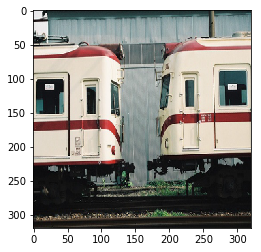

In [139]:
image_name = '2007_000042'
image = cv2.imread('../dataset/val/input/' + image_name + '.jpg') * 1./255
segmets = cv2.imread('../dataset/val/segments/' + image_name + '.png')
image = cv2.resize(image, (320,320), cv2.INTER_NEAREST)

batch = np.expand_dims(image, axis=0)
label = loaded_model.predict(batch, 1)[0]

plt.imshow(image[...,::-1])

In [140]:
label_reshape = label.reshape((320,320,21))
label_reshape.shape

(320, 320, 21)

In [141]:
t = np.argmax(label_reshape, axis=2)
t.shape

(320, 320)

## Background regions

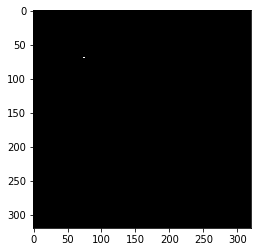

In [142]:
plt.imshow(t == 1, cmap='gray')

# Save w/ color palette

In [143]:
img = Image.fromarray(t.astype(np.uint8)).convert('P')
img.putpalette(PALETTE)
img.save(image_name + '.png')